# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp=pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes


City            object
State           object
Temperature    float64
dtype: object

Como podemos comprobar tenemos dos variables categóricas: city y state y una variable numérica: temperature.

#### Select the rows where state is New York

In [69]:
# your answer here
ny = temp[temp['State']=='New York']
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
ny["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [70]:
# your answer here
fifteen = temp[temp['Temperature']>15][["City","State"]]
fifteen



,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [71]:
# your answer here
fifteen_cities = temp[temp['Temperature']>15][["City"]]
fifteen_cities

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp.loc[(temp['Temperature']>15) & (temp['Temperature']<20)]["City"]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
temp.groupby(['State']).agg({'Temperature':['mean', 'std']})

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
emp=pd.read_csv('Employee.csv')
emp

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
emp.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

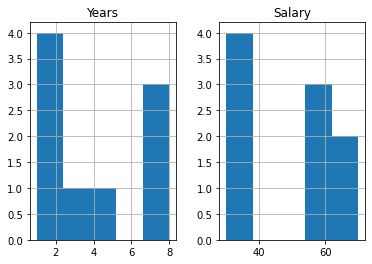

In [13]:
# your answer here
emp.hist( bins='auto')

El histograma nos da información acerca de los valores más frecuentes, el tamaño y la forma de la distribución que siguen los datos.

#### What's the average salary in this company?

In [14]:
# your answer here
emp.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [15]:
# your answer here
emp.Salary.max()

70

#### What's the lowest salary?

In [16]:
# your answer here
emp.Salary.min()

30

#### Who are the employees with the lowest salary?

In [72]:
# your answer here
emp[emp['Salary']==30]['Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [73]:
# your answer here
emp[emp['Name']=='David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [74]:
# your answer here
emp[emp['Name']=='David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [75]:
# your answer here
emp[emp['Title']=='associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
emp.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
emp.iloc[0:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [76]:
# your answer here
emp[(emp['Title']=='associate')&(emp['Salary']>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
# your answer here

emp.groupby(['Years']).agg({'Salary':'mean'})

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [25]:
# your answer here
emp.groupby(['Title']).agg({'Salary': 'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

<AxesSubplot:>

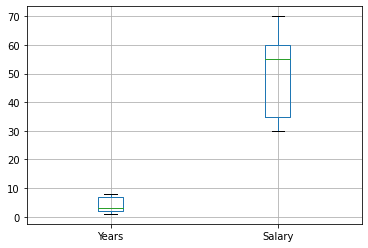

In [26]:
# draw boxplot here
#Boxplot is a standardized way of displaying the distribution of data based on the five number summary: minimum, first quartile, median, third quartile, and maximum. It gives you info on skewness pattern of the distribution, variability or spread of your dataset and IQR where half of the data set falls.
#You can show the mean in a boxplot using the parameter Python showmeans = True

emp.boxplot()

In [27]:
# print first quartile here
emp.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [28]:
# print third quartile here
emp.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [29]:
# your answer here
emp.groupby(['Gender']).agg({'Salary':'mean'})

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here
emp.describe()


,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [31]:
# your answer here
emp.groupby(['Department']).agg({'Salary':lambda x: np.max(x)-np.min(x)})

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [32]:
# your answer here
import patoolib
patoolib.extract_archive("Orders.zip")

patool: Extracting Orders.zip ...
patool: ... Orders.zip extracted to `Orders5' (local file exists).


'Orders5'

In [33]:
orders = pd.read_csv('Orders/Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [34]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [35]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [36]:
# your answer here
orders['UnitPrice'].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [37]:
# your answer here
orders['UnitPrice'].max()

8142.75

In [38]:
# your answer here
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [39]:
# your answer here
spain_cust = orders.set_index(['CustomerID'])
spain_cust = spain_cust[spain_cust['Country'] == 'Spain']
spain_cust.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
CustomerID,,,,,,,,,,,,,
12557,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,Spain,115.5
12557,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,Spain,145.0
12557,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,Spain,99.0
12557,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,Spain,115.5
12557,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [40]:
spain_cust = spain_cust.reset_index()
spain_cust.head()

,CustomerID,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
0,12557,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,Spain,115.5
1,12557,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,Spain,145.0
2,12557,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,Spain,99.0
3,12557,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,Spain,115.5
4,12557,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,Spain,145.0


In [41]:
len(spain_cust.CustomerID.value_counts())

30

#### Select all the customers who have bought more than 50 items ?

In [42]:
# your answer here
cust_orders = orders.groupby('CustomerID', as_index=False).agg({'Quantity': sum})
selected_cust = cust_orders[cust_orders['Quantity'] > 50]
selected_cust.head()

,CustomerID,Quantity
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197


#### Select orders from Spain that are above 50 items

In [43]:
# your answer here
sp_orders = spain_cust[(orders['Quantity'] > 50)]
sp_orders.head()

<ipython-input-43-c9f596b1bbb4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sp_orders = spain_cust[(orders['Quantity'] > 50)]


,CustomerID,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
46,12540,27270,538525,21164,2010,12,1,9,home sweet home metal sign,12,2010-12-13 09:39:00,2.95,Spain,35.40
83,12484,48546,540469,22023,2011,1,5,14,empire birthday card,12,2011-01-07 14:04:00,0.42,Spain,5.04
96,12484,48559,540469,84898F,2011,1,5,14,yellow flowers felt handbag kit,4,2011-01-07 14:04:00,2.10,Spain,8.40
102,12484,48565,540469,20972,2011,1,5,14,pink cream felt craft trinket box,3,2011-01-07 14:04:00,1.25,Spain,3.75
174,12539,50153,540550,22961,2011,1,1,9,jam making set printed,12,2011-01-10 09:11:00,1.45,Spain,17.40


#### Select all free orders

In [44]:
# your answer here
free = orders[orders['UnitPrice'] == 0.00]
free.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [45]:
# your answer here
lunch = orders[orders['Description'].str.contains('lunch bag')]
lunch.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here
(orders[(orders['year'] == 2011) & (orders[orders['Description'].str.contains('lunch bag')])]

#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

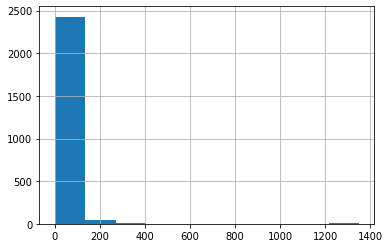

In [53]:
# your answer here
spain_cust['amount_spent'].hist()


#### Select all orders made in the month of August

In [55]:
# your answer here
orders_august = orders[orders['month'] == 8]
orders_august.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [60]:
# your answer here
orders_august['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [66]:
# your answer here
avg_by_country = orders.groupby('Country', as_index = False).agg({'amount_spent':'mean'})
avg_by_country.head()

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500


#### What's the most expensive item?

In [67]:
# your answer here
orders.loc[orders['UnitPrice']==orders['UnitPrice'].max()]

#The most expensive item is Postage

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [68]:
# your answer here
orders.groupby(orders['year']).agg({'amount_spent': 'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
